In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Load the TensorBoard notebook extension
%reload_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from collections import Counter
from cycler import cycler

In [4]:
csv_test_path = "test.csv"
csv_train_path = "train.csv"
# csv_test_path = "/content/drive/MyDrive/ci_minor_project/test.csv"
# csv_train_path = "/content/drive/MyDrive/ci_minor_project/train.csv"

In [5]:
activity_mapping = {'LAYING': 0,
 'SITTING': 1,
 'STANDING': 2,
 'WALKING': 3,
 'WALKING_DOWNSTAIRS': 4,
 'WALKING_UPSTAIRS': 5}

In [6]:
train_dataset = pd.read_csv(csv_train_path)
train_dataset["Output"] = [activity_mapping[item] for item in train_dataset.Activity]
train_dataset = train_dataset.sample(frac=1)
train_dataset.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Output
2453,0.330989,-0.023164,-0.127603,-0.939359,-0.945112,-0.914274,-0.942115,-0.951186,-0.907846,-0.846759,...,0.205985,-0.583380,-0.063551,0.207920,0.326946,-0.256441,-0.705136,14,LAYING,0
5644,0.330084,-0.092868,-0.225607,-0.266946,0.253342,-0.113339,-0.368407,0.213309,-0.141743,0.118163,...,-0.181972,0.179766,-0.641524,-0.834207,-0.823517,0.218273,-0.004265,26,WALKING_UPSTAIRS,5
3331,0.280286,-0.040452,-0.084707,-0.994969,-0.944611,-0.964524,-0.995737,-0.936076,-0.960307,-0.939440,...,0.029242,-0.006214,0.313520,0.018853,0.407746,-0.324074,-0.664762,17,LAYING,0
4400,0.283177,-0.012034,-0.118931,-0.995986,-0.981228,-0.974627,-0.996941,-0.984668,-0.973435,-0.935877,...,-0.039589,-0.058926,0.677321,0.663016,-0.780412,0.241200,-0.034405,22,STANDING,2
4013,0.274259,-0.015223,-0.111837,-0.994001,-0.993320,-0.987184,-0.995009,-0.994182,-0.988905,-0.936999,...,0.155868,0.510167,0.144962,-0.246683,-0.734317,0.118595,0.209119,21,SITTING,1


In [7]:
test_dataset = pd.read_csv(csv_test_path)
test_dataset["Output"] = [activity_mapping[item] for item in test_dataset.Activity]
test_dataset = test_dataset.sample(frac=1)
test_dataset.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Output
2197,0.296209,-0.031235,-0.097588,-0.363844,-0.204968,-0.291543,-0.418120,-0.250647,-0.343813,-0.177943,...,-0.340459,0.825372,-0.953615,0.536281,-0.580256,0.302536,0.225954,18,WALKING_UPSTAIRS,5
1563,0.280112,-0.011175,-0.086946,-0.996598,-0.992786,-0.970397,-0.997116,-0.991613,-0.971723,-0.940527,...,0.067677,0.380954,0.657464,-0.490954,-0.835869,0.155120,0.120700,13,SITTING,1
234,0.208942,-0.020537,-0.083944,-0.410937,-0.073157,-0.473091,-0.445353,-0.161059,-0.477597,-0.287898,...,0.511499,0.187749,0.419517,0.378528,-0.644382,0.322659,-0.082597,2,WALKING,3
1996,0.340043,0.016156,-0.095576,-0.337403,-0.213255,-0.364295,-0.411611,-0.201069,-0.352887,0.081180,...,-0.217860,-0.510124,0.793555,0.857364,-0.695778,0.301407,-0.036431,18,WALKING_UPSTAIRS,5
402,0.288336,0.015082,-0.126872,-0.437091,-0.027838,-0.594156,-0.451793,-0.126790,-0.604980,-0.378191,...,0.012200,0.143687,0.897866,0.733743,-0.835414,0.158987,-0.082914,4,WALKING,3


In [8]:
X_train = train_dataset.drop(["subject", "Activity", "Output"], axis = 1)
y_train = train_dataset["Output"]
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train[:5], y_train[:5]

(array([[ 0.33098894, -0.0231636 , -0.1276026 , ...,  0.32694577,
         -0.25644135, -0.70513602],
        [ 0.33008434, -0.09286806, -0.22560665, ..., -0.82351665,
          0.21827339, -0.00426535],
        [ 0.2802865 , -0.04045244, -0.08470731, ...,  0.4077456 ,
         -0.32407388, -0.66476186],
        [ 0.28317656, -0.01203441, -0.11893077, ..., -0.78041225,
          0.24119975, -0.03440453],
        [ 0.27425948, -0.01522307, -0.11183721, ..., -0.73431668,
          0.11859545,  0.20911935]]),
 array([0, 5, 0, 2, 1]))

In [9]:
X_test = test_dataset.drop(["subject", "Activity", "Output"], axis = 1)
y_test = test_dataset["Output"]
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test[:5], y_test[:5]

(array([[ 0.29620867, -0.031235  , -0.09758832, ..., -0.58025639,
          0.30253606,  0.22595387],
        [ 0.28011222, -0.01117537, -0.0869463 , ..., -0.83586936,
          0.15512029,  0.12069968],
        [ 0.20894174, -0.02053671, -0.08394378, ..., -0.64438174,
          0.32265912, -0.08259691],
        [ 0.34004332,  0.01615627, -0.09557637, ..., -0.69577846,
          0.30140682, -0.0364306 ],
        [ 0.28833576,  0.01508198, -0.12687212, ..., -0.83541411,
          0.15898734, -0.08291427]]),
 array([5, 1, 3, 5, 3]))

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

In [11]:
# Group and count main names of columns
both_df = pd.concat([train_dataset, test_dataset], axis=0).reset_index(drop=True)
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in both_df.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


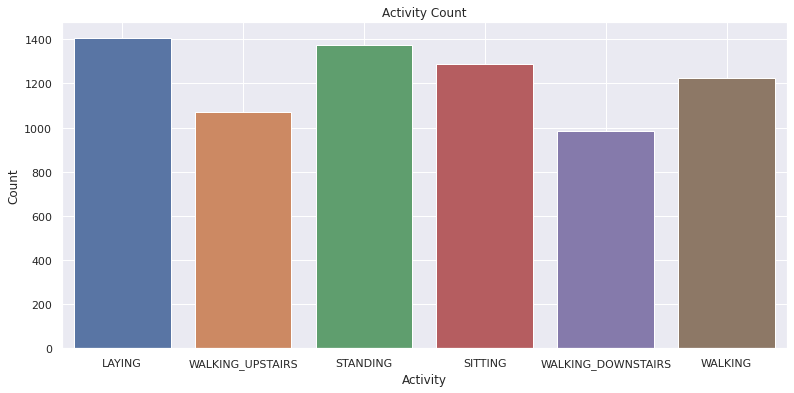

In [12]:
sns.set(rc={'figure.figsize':(13,6)})
fig = sns.countplot(x = "Activity" , data = train_dataset)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Count")
plt.grid(True)
plt.show(fig)

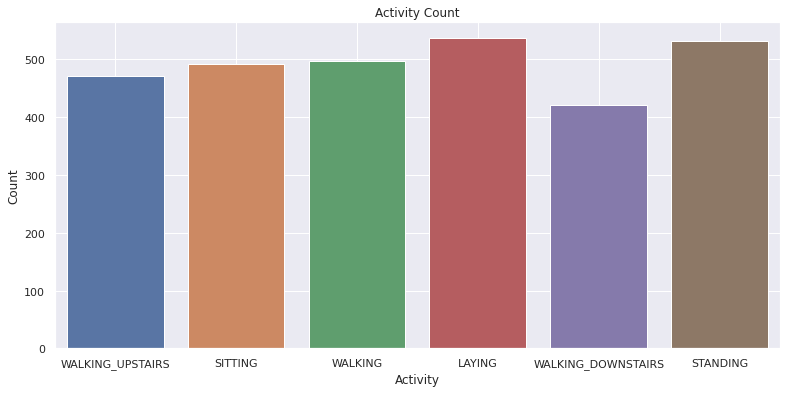

In [13]:
sns.set(rc={'figure.figsize':(13,6)})
fig = sns.countplot(x = "Activity" , data = test_dataset)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Count")
plt.grid(True)
plt.show(fig)

In [14]:
from sklearn.model_selection import KFold, cross_val_score

def kFoldCrossValidation(model_T, X_dataset, y_dataset, k = 3, epochs = 10):
    iteration_cnt = 0
    k_fold = KFold(n_splits=k)
    for train_indices, test_indices in k_fold.split(X_dataset):
        iteration_cnt += 1
        print(f"\n------------------- ITERATION {iteration_cnt} ---------------------------")
        
        model = model_T

        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

        model.fit(X_dataset[train_indices], y_dataset[train_indices], epochs=epochs, callbacks=[tensorboard_callback], verbose = 0)
        score, acc = model.evaluate(X_dataset[test_indices], y_dataset[test_indices])
        print('Test score:', score)
        print('Test accuracy:', acc)


------------------- ITERATION 1 ---------------------------
46/46 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9653
Test score: 0.10538206249475479
Test accuracy: 0.9653297066688538

------------------- ITERATION 2 ---------------------------
46/46 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9823
Test score: 0.04941172897815704
Test accuracy: 0.9823249578475952

------------------- ITERATION 3 ---------------------------
46/46 [==============================] - 0s 2ms/step - loss: 0.0819 - accuracy: 0.9694
Test score: 0.08192715048789978
Test accuracy: 0.9693877696990967

------------------- ITERATION 4 ---------------------------
46/46 [==============================] - 0s 1ms/step - loss: 0.0436 - accuracy: 0.9837
Test score: 0.04356721043586731
Test accuracy: 0.9836734533309937

------------------- ITERATION 5 ---------------------------
46/46 [==============================] - 0s 1ms/step - loss: 0.0411 - accuracy: 0.9

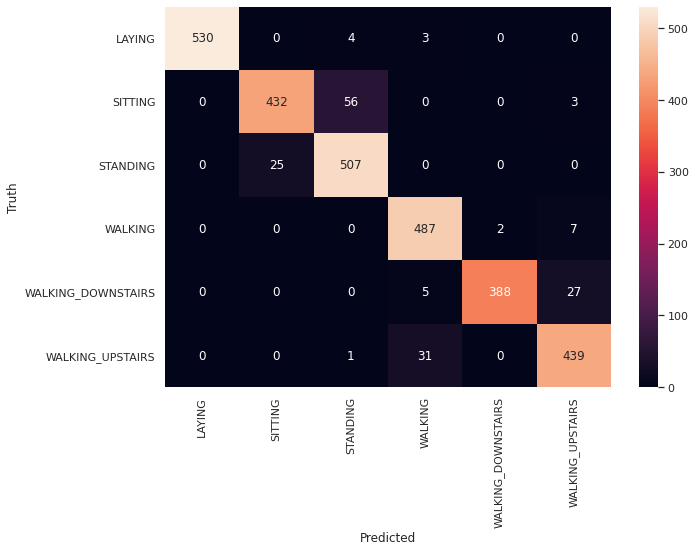

In [15]:
# 1st Model
model = keras.Sequential([
            keras.layers.Dense(10, input_shape=(561,), activation='relu'),
            keras.layers.Dense(6, activation='sigmoid')
        ])

kFoldCrossValidation(model, X_train, y_train, 5)

print(model.summary())

model.evaluate(X_test, y_test)

# Confusion Matrix
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',xticklabels = activity_mapping.keys(), yticklabels = activity_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Truth')

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Second Model
model = keras.Sequential([
            keras.layers.Dense(50, input_shape=(561,), activation='relu'),
            keras.layers.Dense(6, activation='sigmoid')
        ])

kFoldCrossValidation(model, X_train, y_train, 5)

print(model.summary())
model.evaluate(X_test, y_test)

# Confusion Matrix
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',xticklabels = activity_mapping.keys(), yticklabels = activity_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Truth')

from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)


------------------- ITERATION 1 ---------------------------
46/46 [==============================] - 0s 2ms/step - loss: 0.0604 - accuracy: 0.9782
Test score: 0.06041914224624634
Test accuracy: 0.9782460927963257

------------------- ITERATION 2 ---------------------------
46/46 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9844
Test score: 0.04149189963936806
Test accuracy: 0.98436439037323

------------------- ITERATION 3 ---------------------------
46/46 [==============================] - 0s 2ms/step - loss: 0.1059 - accuracy: 0.9571
Test score: 0.10594320297241211
Test accuracy: 0.9571428298950195

------------------- ITERATION 4 ---------------------------
46/46 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9878
Test score: 0.02874922938644886
Test accuracy: 0.9877551198005676

------------------- ITERATION 5 ---------------------------


In [17]:
# 3rd Model
model = keras.Sequential([
            keras.layers.Dense(100, input_shape=(561,), activation='relu'),
            keras.layers.Dense(6, activation='sigmoid')
        ])

kFoldCrossValidation(model, X_train, y_train, 5,epochs=100)

print(model.summary())
model.evaluate(X_test, y_test)

# Confusion Matrix
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',xticklabels = activity_mapping.keys(), yticklabels = activity_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Truth')

from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)


------------------- ITERATION 1 ---------------------------
46/46 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9884
Test score: 0.04008504003286362
Test accuracy: 0.9884432554244995

------------------- ITERATION 2 ---------------------------


KeyboardInterrupt: 

In [ ]:
# 4rd Model
model = keras.Sequential([
            keras.layers.Dense(100, input_shape=(561,), activation='relu'),
            keras.layers.Dense(6, activation='sigmoid')
        ])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(X_train, y_train, epochs=100, callbacks=[tensorboard_callback], verbose = 0)

print(model.summary())
model.evaluate(X_test, y_test)

# Confusion Matrix
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',xticklabels = activity_mapping.keys(), yticklabels = activity_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Truth')

from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# 5rd Model
model = keras.Sequential([
            keras.layers.Dense(100, input_shape=(561,), activation='relu'),
            keras.layers.Dense(50, input_shape=(561,), activation='relu'),
            keras.layers.Dense(6, activation='sigmoid')
        ])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(X_train, y_train, epochs=100, callbacks=[tensorboard_callback], verbose = 0)

print(model.summary())
model.evaluate(X_test, y_test)

# Confusion Matrix
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',xticklabels = activity_mapping.keys(), yticklabels = activity_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Truth')

from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# 6rd Model
model = keras.Sequential([
            keras.layers.Dense(100, input_shape=(561,), activation='tanh'),
            keras.layers.Dense(6, activation='sigmoid')
        ])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(X_train, y_train, epochs=100, callbacks=[tensorboard_callback], verbose = 0)

print(model.summary())
model.evaluate(X_test, y_test)

# Confusion Matrix
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',xticklabels = activity_mapping.keys(), yticklabels = activity_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Truth')

from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
!pip install shap
import shap

# select a set of background examples to take an expectation over
background = X_train[np.random.choice(X_train.shape[0], 500, replace=False)]


# explain predictions of the model
e = shap.DeepExplainer(model, background)

shap_values = e.shap_values(X_test[np.random.choice(X_test.shape[0], 20, replace=False)])

In [ ]:
# plot the feature attributions
shap.summary_plot(shap_values, -X_test[1:5], class_names = list(activity_mapping.keys()), feature_names = test_dataset.columns.values)